In [15]:
import tensorflow as tf
from keras import layers
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs)

In [16]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 3, 3, 128)         7385

In [18]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [20]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [21]:
model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64
)

Epoch 1/5
938/938 [==============================] - 10s 5ms/step - loss: 0.1565 - accuracy: 0.9509
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0443 - accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0307 - accuracy: 0.9910
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0231 - accuracy: 0.9932
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0174 - accuracy: 0.9945


In [22]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9928


[0.02622157335281372, 0.9927999973297119]

In [24]:
test_images[15].shape

(28, 28, 1)

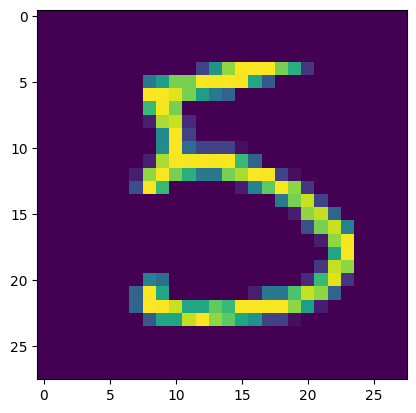

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as img
plt.imshow(test_images[15])
plt.show()

In [32]:
image_to_predict = tf.expand_dims(test_images[15], axis=0)
image_to_predict.shape

TensorShape([1, 28, 28, 1])

In [33]:
prediction = model.predict(image_to_predict)

1/1 [==============================] - 0s 261ms/step


In [34]:
prediction

array([[7.1856479e-12, 8.1593787e-13, 6.1659275e-11, 7.5345833e-06,
        6.1146538e-15, 9.9999249e-01, 1.6587255e-09, 2.8647290e-10,
        6.2556521e-10, 6.5096151e-10]], dtype=float32)

In [36]:
pred = tf.argmax(prediction, axis=1)
pred.numpy()

array([5], dtype=int64)

In [44]:
inp = layers.Input(shape=(5, 5, 1))
x = layers.Conv2D(filters=32, kernel_size=3, strides=1)(inp)
x.shape

TensorShape([None, 3, 3, 32])

In [47]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_without_max_pooling = tf.keras.models.Model(inputs ,outputs)

In [48]:
model_without_max_pooling.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_41 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_42 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_7 (Flatten)         (None, 61952)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

In [71]:
# using small dataset of 1000 train, 500 validation, 1000 testing
import os, pathlib, shutil
base_dir = pathlib.Path('dogs-vs-cats')
new_base_dir = pathlib.Path('cats_vs_dogs_small')
def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=base_dir/category/fname,
                            dst=dir/fname)

In [73]:
make_subset('train', start_index=1, end_index=1001)

In [74]:
make_subset('validation', start_index=1001, end_index=1501)
make_subset('test', start_index=1501, end_index=2501)

In [78]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.models import Model
inputs = Input(shape=(180, 180, 3))
x = Conv2D(32, 3, activation='relu')(inputs)
x = MaxPooling2D(2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(128, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(256, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(256, 3, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model_2 = Model(inputs, outputs)


model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [79]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_49 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 41, 41, 128)       7385

In [80]:
# Reading the images into datasets
train_dir = 'cats_vs_dogs_small/train'
validation_dir = 'cats_vs_dogs_small/validation'
test_dir = 'cats_vs_dogs_small/test'
from keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    directory=train_dir,
    batch_size=32,
    image_size=(180, 180),
    label_mode='binary'
)
validation_dataset = image_dataset_from_directory(
    directory=validation_dir,
    batch_size=32,
    image_size=(180, 180),
    label_mode='binary'
)
test_dataset = image_dataset_from_directory(
    directory=test_dir,
    batch_size=32,
    image_size=(180, 180),
    label_mode='binary'
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [81]:
callbacks = [tf.keras.callbacks.ModelCheckpoint('cats_vs_dogs_small/model_2_small_dataset',
                                                save_best_only=True,
                                                monitor='val_loss')]
history_model_2 = model_2.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 30.3733 - accuracy: 0.5155

INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


63/63 [==============================] - 6s 67ms/step - loss: 30.3733 - accuracy: 0.5155 - val_loss: 0.7037 - val_accuracy: 0.5130
Epoch 2/30
61/63 [============================>.] - ETA: 0s - loss: 0.7743 - accuracy: 0.5282

INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


63/63 [==============================] - 4s 55ms/step - loss: 0.7728 - accuracy: 0.5260 - val_loss: 0.6899 - val_accuracy: 0.5270
Epoch 3/30
63/63 [==============================] - 3s 40ms/step - loss: 0.7250 - accuracy: 0.5635 - val_loss: 0.7320 - val_accuracy: 0.5080
Epoch 4/30
61/63 [============================>.] - ETA: 0s - loss: 0.7078 - accuracy: 0.6071

INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


63/63 [==============================] - 3s 53ms/step - loss: 0.7048 - accuracy: 0.6090 - val_loss: 0.6556 - val_accuracy: 0.6380
Epoch 5/30
61/63 [============================>.] - ETA: 0s - loss: 0.7626 - accuracy: 0.6383

INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


63/63 [==============================] - 3s 52ms/step - loss: 0.7592 - accuracy: 0.6380 - val_loss: 0.6437 - val_accuracy: 0.6210
Epoch 6/30
61/63 [============================>.] - ETA: 0s - loss: 0.5830 - accuracy: 0.7003

INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


INFO:tensorflow:Assets written to: cats_vs_dogs_small\model_2_small_dataset\assets


63/63 [==============================] - 3s 53ms/step - loss: 0.5836 - accuracy: 0.6995 - val_loss: 0.6380 - val_accuracy: 0.6370
Epoch 7/30
63/63 [==============================] - 3s 40ms/step - loss: 0.5359 - accuracy: 0.7370 - val_loss: 0.8791 - val_accuracy: 0.6850
Epoch 8/30
63/63 [==============================] - 3s 41ms/step - loss: 0.5216 - accuracy: 0.7570 - val_loss: 0.7270 - val_accuracy: 0.6680
Epoch 9/30
63/63 [==============================] - 3s 40ms/step - loss: 0.4689 - accuracy: 0.8030 - val_loss: 2.1316 - val_accuracy: 0.5520
Epoch 10/30
63/63 [==============================] - 3s 45ms/step - loss: 0.3807 - accuracy: 0.8330 - val_loss: 1.0122 - val_accuracy: 0.6550
Epoch 11/30
63/63 [==============================] - 3s 50ms/step - loss: 0.3000 - accuracy: 0.8760 - val_loss: 1.1855 - val_accuracy: 0.6330
Epoch 12/30
63/63 [==============================] - 3s 42ms/step - loss: 0.3795 - accuracy: 0.8715 - val_loss: 0.8405 - val_accuracy: 0.6820
Epoch 13/30
63/63 [==

In [86]:
def plot_loss_curve(history):
    loss = history.history["loss"]
    val_loss = history.history["val_accuracy"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epoch = range(len(history.history["loss"]))

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epoch, loss, label="Training Loss")
    plt.plot(epoch, val_loss, label="Validation Loss")
    plt.title("Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(epoch, accuracy, label="Training Accuracy")
    plt.plot(epoch, val_accuracy, label="Validation Accuracy")
    plt.title("Accuracy Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

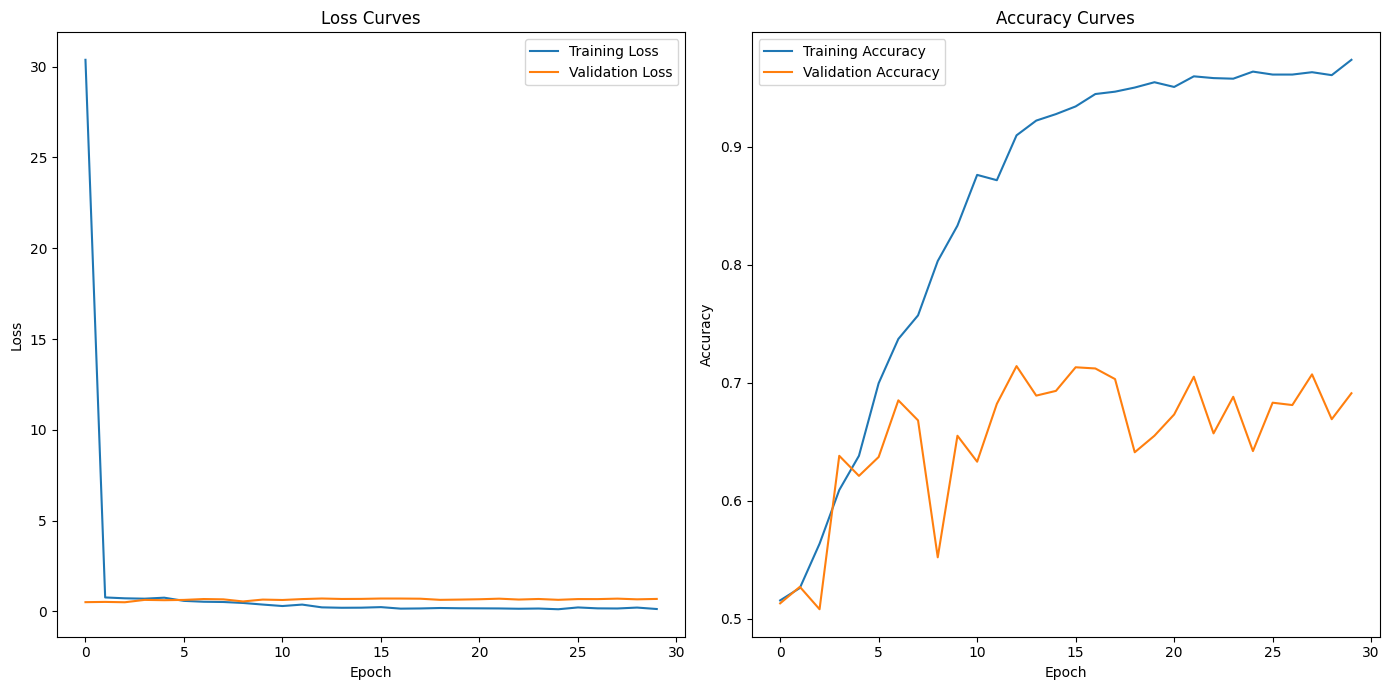

In [87]:
plot_loss_curve(history=history_model_2)

In [88]:
model_2.evaluate(validation_dataset)

32/32 [==============================] - 1s 15ms/step - loss: 3.7289 - accuracy: 0.6910


[3.728910446166992, 0.6909999847412109]

In [89]:
model_2 = tf.keras.models.load_model('cats_vs_dogs_small/model_2_small_dataset')
model_2.evaluate(validation_dataset)

32/32 [==============================] - 1s 14ms/step - loss: 0.6380 - accuracy: 0.6370


[0.6379686594009399, 0.6370000243186951]

In [90]:
# Using data augmentation and scalling
data_augmentation = tf.keras.models.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [ ]:
inputs = Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(128, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(256, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(256, 3, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(1, activation='sigmoid')(x)
model_3 = Model(inputs, outputs)

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='rmsprop',
    metrics=['accuracy']
)

callbacks = [tf.keras.callbacks.ModelCheckpoint('cats_vs_dogs_small/model_3_normalized_data_augmentation',
                                                save_best_only=True,
                                                monitor='val_loss')]

history_model_3 = model_3.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

In [93]:
model_3.evaluate(test_dataset)

63/63 [==============================] - 2s 17ms/step - loss: 1.9354 - accuracy: 0.7555


[1.9354051351547241, 0.7555000185966492]

In [ ]:
model_3 = tf.keras.models.load_model('cats_vs_dogs_small/model_3_normalized_data_augmentation')
model_3.evaluate(test_dataset)

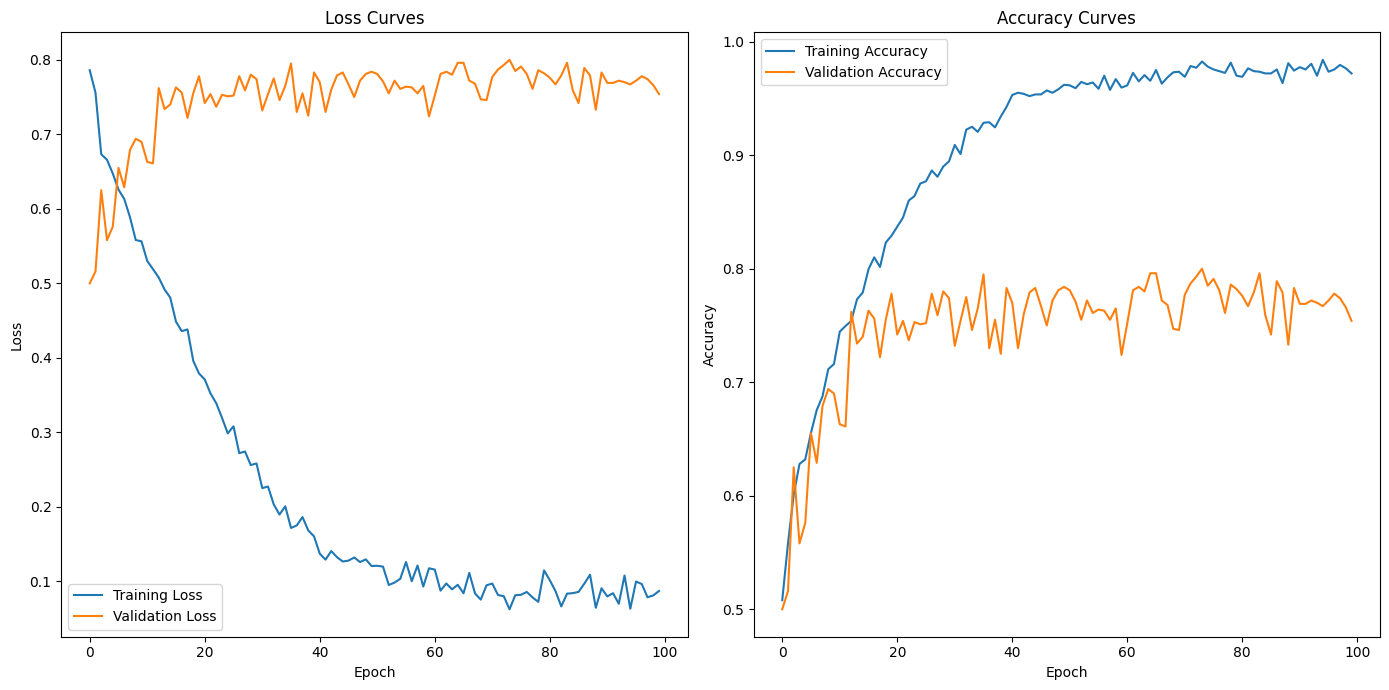

In [95]:
plot_loss_curve(history=history_model_3)

In [97]:
# using feature extraction
conv_base = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [98]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [99]:
import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
        return np.concatenate(all_features), np.concatenate(all_labels)

In [100]:
train_features, train_labels = get_features_and_labels(train_dataset)
validation_features, validation_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 18ms/step


In [101]:
train_features.shape

(32, 5, 5, 512)

In [ ]:
inputs = Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = Model(inputs, outputs)

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='rmsprop',
    metrics=['accuracy']
)

callbacks = [tf.keras.callbacks.ModelCheckpoint('cats_vs_dogs_small/model_4_feature_extraction',
                                                save_best_only=True,
                                                monitor='val_loss')]

history_model_4 = model_4.fit(
    train_features,
    train_labels,
    epochs=20,
    validation_data=(validation_features, validation_labels),
    callbacks=callbacks
)

In [104]:
model_4.evaluate(test_features, test_labels)

1/1 [==============================] - 0s 21ms/step - loss: 2.5540 - accuracy: 0.7812


[2.553994655609131, 0.78125]

In [105]:
model_4 = tf.keras.models.load_model('cats_vs_dogs_small/model_4_feature_extraction')
model_4.evaluate(test_features, test_labels)

1/1 [==============================] - 0s 85ms/step - loss: 1.4057 - accuracy: 0.9062


[1.4057068824768066, 0.90625]

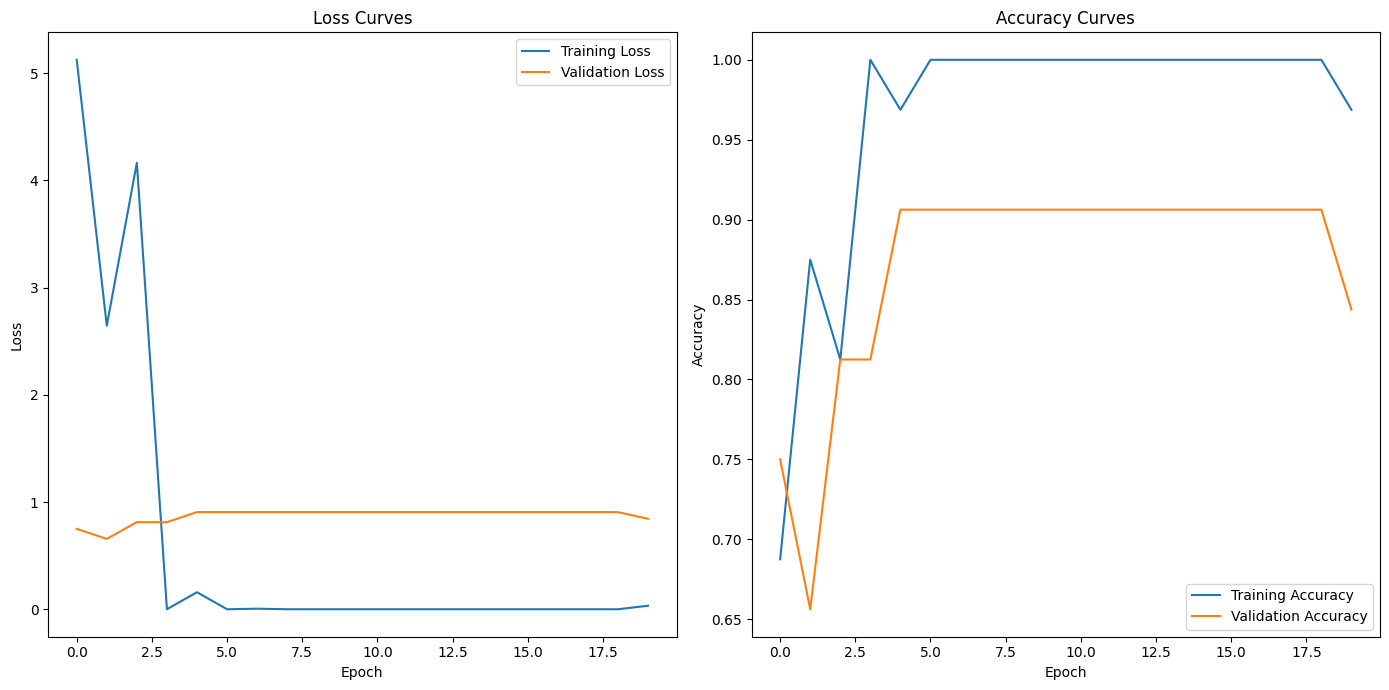

In [106]:
plot_loss_curve(history=history_model_4)

In [107]:
conv_base = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False
)
conv_base.trainable = False
len(conv_base.trainable_weights)

0

In [110]:
conv_base.trainable = False
len(conv_base.trainable_weights)

0

In [ ]:
# inputs = Input(shape=(180, 180, 3))
# x = data_augmentation(inputs)
# x = tf.keras.applications.vgg16.preprocess_input(x)
# x = conv_base(x)
# x = layers.Flatten()(x)
# x = Dense(256)(x)
# x = layers.Dropout(0.5)(x)
# outputs = Dense(1, activation='sigmoid')(x)
# model_5 = Model(inputs, outputs)
#
# model_5.compile(
#     loss=tf.keras.losses.BinaryCrossentropy(),
#     optimizer='rmsprop',
#     metrics=['accuracy']
# )
#
# callbacks = [tf.keras.callbacks.ModelCheckpoint('cats_vs_dogs_small/model_5_extraction_data_augmentation',
#                                                 save_best_only=True,
#                                                 monitor='val_loss')]
#
# history_model_5 = model_5.fit(
#     train_dataset,
#     epochs=50,
#     validation_data=validation_dataset,
#     callbacks=callbacks
# )

In [124]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = Input(shape=(180, 180, 3))
# x = layers.Rescaling(1./255)(inputs)
x= data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = Dense(1, activation='sigmoid')(x)
model_5 = Model(inputs, outputs)

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'],
    optimizer='adam'
)

callbacks = [tf.keras.callbacks.ModelCheckpoint('cats_vs_dogs_small/model_5_efficientnet_b0',
                                                save_best_only=True,
                                                monitor='val_loss')]

history_model_5 = model_5.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    # callbacks=callbacks
)

Epoch 1/50


63/63 [==============================] - 21s 236ms/step - loss: 0.2682 - accuracy: 0.9325 - val_loss: 0.1264 - val_accuracy: 0.9710
Epoch 2/50
63/63 [==============================] - 14s 220ms/step - loss: 0.1119 - accuracy: 0.9675 - val_loss: 0.0828 - val_accuracy: 0.9790
Epoch 3/50
63/63 [==============================] - 14s 219ms/step - loss: 0.0807 - accuracy: 0.9790 - val_loss: 0.0664 - val_accuracy: 0.9830
Epoch 4/50
63/63 [==============================] - 14s 220ms/step - loss: 0.0655 - accuracy: 0.9840 - val_loss: 0.0583 - val_accuracy: 0.9820
Epoch 5/50
63/63 [==============================] - 14s 219ms/step - loss: 0.0604 - accuracy: 0.9845 - val_loss: 0.0517 - val_accuracy: 0.9830
Epoch 6/50
63/63 [==============================] - 14s 218ms/step - loss: 0.0599 - accuracy: 0.9815 - val_loss: 0.0476 - val_accuracy: 0.9840
Epoch 7/50
63/63 [==============================] - 14s 218ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0453 - val_accuracy: 0.9840
Epoch 8/50